<a href="https://colab.research.google.com/github/mariatomy9/Geospatial-Interpolation/blob/main/00_ordinary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Ordinary Kriging Example

First we will create a 2D dataset together with the associated x, y grids.


In [ ]:
! pip install PyKrige

     |████████████████████████████████| 734 kB 12.0 MB/s 


In [ ]:
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt


data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

Create the ordinary kriging object. Required inputs are the X-coordinates of
the data points, the Y-coordinates of the data points, and the Z-values of the
data points. If no variogram model is specified, defaults to a linear variogram
model. If no variogram model parameters are specified, then the code automatically
calculates the parameters by fitting the variogram model to the binned
experimental semivariogram. The verbose kwarg controls code talk-back, and
the enable_plotting kwarg controls the display of the semivariogram.



In [ ]:
data[:, 0]

array([0.3, 1.9, 1.1, 3.3, 4.7])

In [ ]:
OK = OrdinaryKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
)

Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
grid of points, on a masked rectangular grid of points, or with arbitrary points.
(See OrdinaryKriging.__doc__ for more information.)



In [ ]:
z, ss = OK.execute("grid", gridx, gridy)

In [ ]:
gridx

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
z

masked_array(
  data=[[0.44243502318239175, 0.46009300267963094, 0.48677783416289994,
         0.5242839728091135, 0.5826773564279741, 0.6675723108302893,
         0.7620512011204206, 0.8552925548628063, 0.9430497678050291,
         1.023187939028162, 1.0946125446173114],
        [0.44546200237916256, 0.4627755254249186, 0.49123000817954043,
         0.525840071764101, 0.5795484583522866, 0.689439673895844,
         0.7980312976452971, 0.9006988715149922, 0.9951008365617124,
         1.079539338162373, 1.153091685732461],
        [0.4567678595817516, 0.47570977301135936, 0.5152091408727116,
         0.5633696804103182, 0.6341512271967441, 0.7400134608541518,
         0.8528837354904467, 0.9609834004362499, 1.059944137430366,
         1.1471586339367559, 1.2213171632630055],
        [0.4874447605759909, 0.5115588127198102, 0.5588711354322347,
         0.6224411173760791, 0.7066806640237211, 0.8111710290752912,
         0.9244416338918073, 1.0355366062469609, 1.1376089173894663,
        

Writes the kriged grid to an ASCII grid file and plot it.



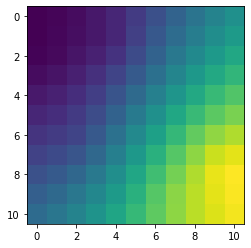

In [ ]:
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
plt.imshow(z)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import glob
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch

In [ ]:
df=pd.read_csv('Turf.csv')

In [ ]:
lats=np.array(df['Latitude'])
lons=np.array(df['Longtitude'])
data_moist=np.array(df['Moisture'])

In [ ]:
grid_space = 0.001
grid_lon = np.arange(np.amin(lons), np.amax(lons), grid_space) #grid_space is the desired delta/step of the output array
grid_lat = np.arange(np.amin(lats), np.amax(lats), grid_space)

In [ ]:
data_moist = [s.replace("%", "") for s in data_moist]

In [ ]:
for i in range(0,len(data_moist)):
  data_moist[i]=int(data_moist[i])/100

In [ ]:
data_moist=np.array(data_moist)

In [ ]:
data_moist

array([0.18, 0.15, 0.15, 0.15, 0.24, 0.16, 0.15, 0.16, 0.21, 0.13, 0.21,
       0.22, 0.12, 0.27, 0.32, 0.15, 0.15, 0.18, 0.21, 0.19, 0.16, 0.15,
       0.13, 0.19, 0.15, 0.17, 0.19, 0.31, 0.19, 0.2 , 0.17, 0.16, 0.13,
       0.16, 0.11, 0.15])

In [ ]:
grid_lon.shape

(14,)

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 0.0014591157650913386
Full Sill: 0.0020391126879061414
Range: 9.963611018671853e-05
Nugget: 0.0005799969228148027 



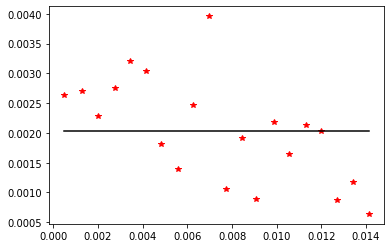

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



In [ ]:
OK = OrdinaryKriging(lons, lats, data_moist, variogram_model='gaussian', verbose=True, enable_plotting=True,nlags=20)
z1, ss1 = OK.execute('grid', grid_lon, grid_lat)

In [ ]:
ini_array1 = np.array(z1)
result = ini_array1.flatten()

In [ ]:
result

array([0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.1656135 , 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833405,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.1930306 , 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833438,
       0.17833438, 0.17833438, 0.17833438, 0.17833438, 0.17833

In [ ]:
lats.max()-lats.min()

0.008384000000006608

In [ ]:
lons.max()-lons.min()

0.013428000000004658

In [ ]:
grid_lat.min(),grid_lat.max()

(-41.140182, -41.13218200000002)

In [ ]:
grid_lat.shape

(9,)

In [ ]:
!pip install folium==0.12.1

In [ ]:
175.010864 175.024292
-41.131798 -41.140182

In [ ]:
import folium
from folium.plugins import HeatMap
# import the geopy module
import geopy
import statistics

meanLong = statistics.mean(grid_lon)
meanLat = statistics.mean(grid_lat)
# create base map object using Map()
mapObj = folium.Map(location=[meanLat, meanLong], zoom_start = 14.5)
# create heatmap layer
heatmap = HeatMap( list(zip(grid_lat, grid_lon, result)),
                   min_opacity=0.2,
                   max_val=result.min(),
                   radius=50, blur=50
                   )
heatmap.add_to(mapObj)
folium.Marker([meanLat, meanLong], popup="<i>Wellington Golf Club</i>").add_to(mapObj)
for lat, long, moist in zip(grid_lat, grid_lon,df['Moisture']):
    label = '{}'.format(moist)
    label = folium.Popup(label, parse_html=True)
    
    if moist in range(10,16):
      marker=folium.CircleMarker([lat, long],radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7,
      parse_html=False)
      marker.add_to(mapObj)

    elif moist in range(16,21):
      marker=folium.CircleMarker([lat, long],
      radius=5,
      popup=label,
      color='yellow',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7,
      parse_html=False)
      marker.add_to(mapObj)

    elif moist in range(21,26):
      marker=folium.CircleMarker([lat, long],
      radius=5,
      popup=label,
      color='red',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7,
      parse_html=False)
      marker.add_to(mapObj)

    elif moist in range(26,31):
      marker=folium.CircleMarker([lat, long],
      radius=5,
      popup=label,
      color='green',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7,
      parse_html=False)
      marker.add_to(mapObj)

    else:
      marker=folium.CircleMarker([lat, long],
      radius=5,
      popup=label,
      color='violet',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7,
      parse_html=False)
      marker.add_to(mapObj)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  from ipykernel import kernelapp as app


In [ ]:
mapObj

In [ ]:
meanLat=[, -41.142829]
meanLong=[, 175.030121]

In [ ]:
mapObj = folium.Map(location=[-41.128701, 175.008512], zoom_start = 14.5)
folium.Marker([-41.128701, 175.008512], popup="<i>Wellington Golf Club</i>").add_to(mapObj)
mapObj

In [ ]:
mapObj = folium.Map(location=[-41.138359, 175.010276], zoom_start = 14.5)
folium.Marker([-41.138359, 175.010276], popup="<i>Wellington Golf Club</i>").add_to(mapObj)
folium.Marker([-41.130510, 175.024013], popup="<i>Wellington Golf Club</i>").add_to(mapObj)
folium.Marker([-41.142052, 175.013558], popup="<i>Wellington Golf Club</i>").add_to(mapObj)
folium.Marker([-41.135117, 175.028397], popup="<i>Wellington Golf Club</i>").add_to(mapObj)
folium.Marker([-41.139660, 175.024020], popup="<i>Wellington Golf Club</i>").add_to(mapObj)
mapObj

In [ ]:
import plotly.express as px
fig, ax = plt.subplots(figsize=(12, 6))                 # map size
dist.plot(ax=ax, color='lightgrey')                     # underying map
dist.plot(column='totalpopul', ax=ax, cmap='viridis')